In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [45]:
titanic_df = pd.read_csv("C:\\Users\\GPT BANTWAL\\Downloads\\titanic.csv")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


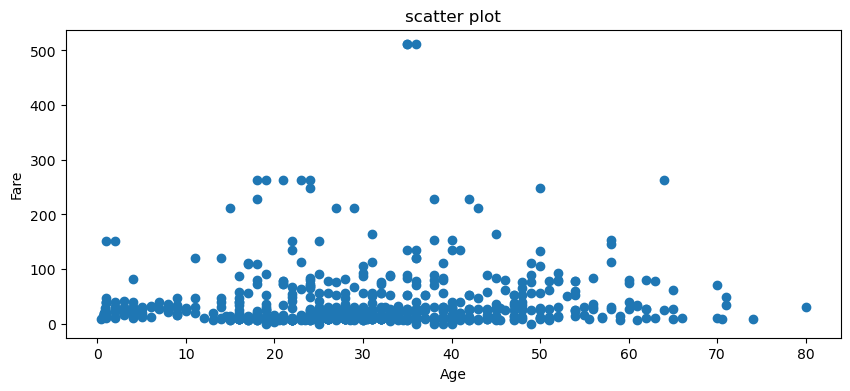

In [46]:
fig,ax = plt.subplots(figsize=(10,4))
ax.scatter(titanic_df['age'],titanic_df['fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.title("scatter plot")
plt.show()

<Axes: >

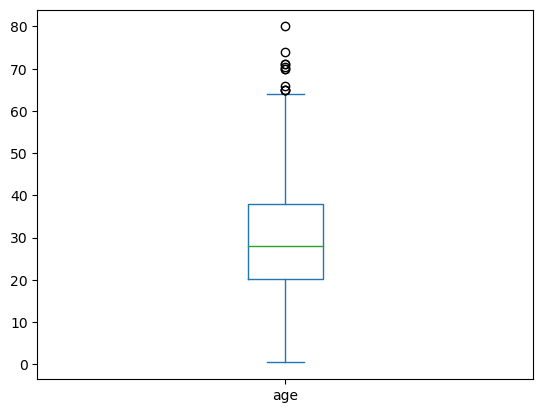

In [47]:
titanic_df['age'].plot(kind='box')

In [48]:
q1 = titanic_df["age"]
q3 = titanic_df['age'].quantile(0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [49]:
age_arr = titanic_df["age"]
outliers = age_arr[(age_arr <= lower_bound) | (age_arr >= upper_bound)]
print('The following are the outliers in the boxplot of age:\n',outliers)

The following are the outliers in the boxplot of age:
 1      38.0
6      54.0
11     58.0
13     39.0
15     55.0
       ... 
865    42.0
871    47.0
873    47.0
879    56.0
885    39.0
Name: age, Length: 188, dtype: float64


# remove data object with outliers


<Axes: ylabel='Frequency'>

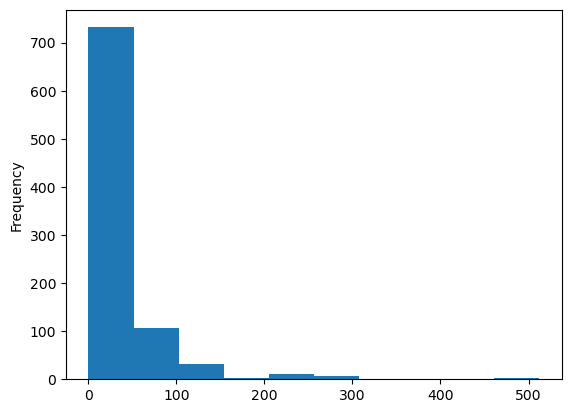

In [50]:
titanic_df['fare'].plot(kind='hist')

In [59]:
upperIndex = titanic_df[titanic_df['age']>upper_bound].index
titanic_df.drop(upperIndex,inplace=True)
lowerIndex = titanic_df[titanic_df['age']<lower_bound].index
titanic_df.drop(lowerIndex,inplace=True)
titanic_df.info()

ValueError: Can only compare identically-labeled Series objects